# Bike Sharing Assignment using Multiple Linear Regression

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands

## Business Goal:
As a part of this assignment, prepare a model of demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Steps for building the model
Step 1: Reading and Understanding the Data

Step 2: Visualising the Data

Step 3: Data Preparation

Step 4: Splitting the Data into Training and Testing Sets

Step 5: Building a linear model

Step 6: Residual Analysis of the train data

Step 7: Making Predictions Using the Final Model

Step 8: Model Evaluation

## Step 1: Reading and Understanding the Data

In [1]:
##Importing Required Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

import warnings
warnings.filterwarnings('ignore')

#StatsModel Library for displaying detailed information about model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Scikit Library for evaluating requirement specific parameters and performing preprocessing steps (like Splitting & Scaling)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
# Import the data into the python notebook
bike_sharing_data=pd.read_csv('day.csv')
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing_data.shape

(730, 16)

In [4]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Type Observation

Bike Sharing dataset is having 730 rows and 16 columns

except one column i.e.'dteday'all other columns are either float or an integer

All column are non nulls, so there are no null or missing values in the dataset





## Data Cleaning

From the data dictonary we have

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [6]:
# From above data definitaion, column instant is an index and column dteday is date, 
# where as in the dataset we already have two seperate colums for Month and Year. 
# Also casual and regristerd can also be dropped as we have total of these column as cnt
# So we can drop these two columns

In [7]:
# Drop 'instant' and dteday columns
bike_sharing_data.drop(['instant'],axis=1,inplace=True)
bike_sharing_data.drop(['dteday'],axis=1,inplace=True)
bike_sharing_data.drop(['casual'],axis=1,inplace=True)
bike_sharing_data.drop(['registered'],axis=1,inplace=True)

In [8]:
bike_sharing_data.shape

(730, 12)

In [9]:
# There are columns those are categorical in nature but having numeric values like 'season', 'yr','mnth','holiday', weekday','workingday' and 'weathersit'
# Changing them to have meaningful categories

In [10]:
bike_sharing_data['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

bike_sharing_data['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

bike_sharing_data['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)

bike_sharing_data['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

In [11]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thurs,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data and EDA

In [12]:
# Boxplot of all the categorical vairbales against dependent variable 'cnt'
# Scatter Plot of all the numerical variable against dependent variable 'cnt'
# Co-relations of all the variables against each other


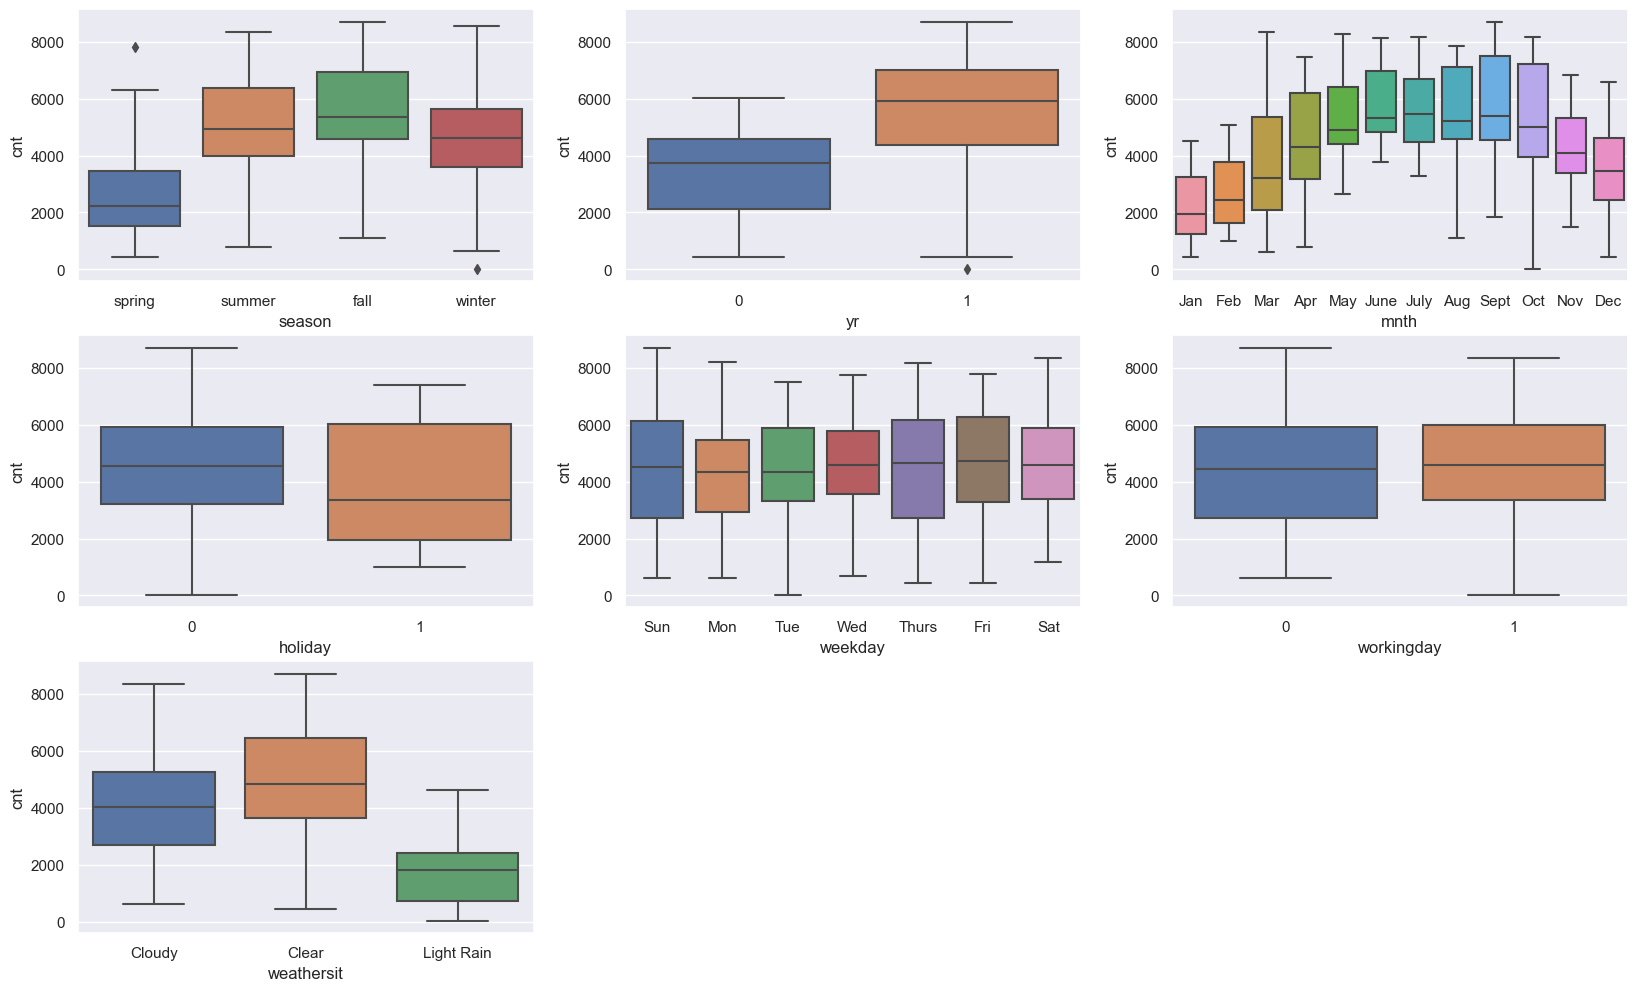

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_data)
plt.show()

### Inference
season: In season fall bike were hired more than any other seasons

yr: In 2019 year bike hiring was increased as compared to previous year 2018

holiday: bikes were hired more during non holidays

weathersit: bikes were hired more when weather is clear

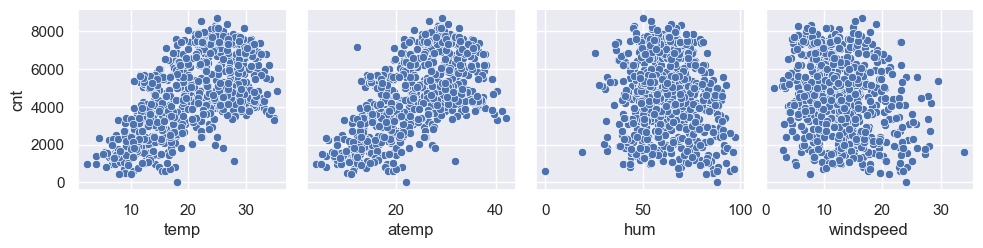

In [14]:
#Visualising Numeric Variables
#Let's make a pairplot of all the numeric variables

sns.pairplot(bike_sharing_data,x_vars=["temp", "atemp", "hum",'windspeed'], y_vars=['cnt'])
plt.show()

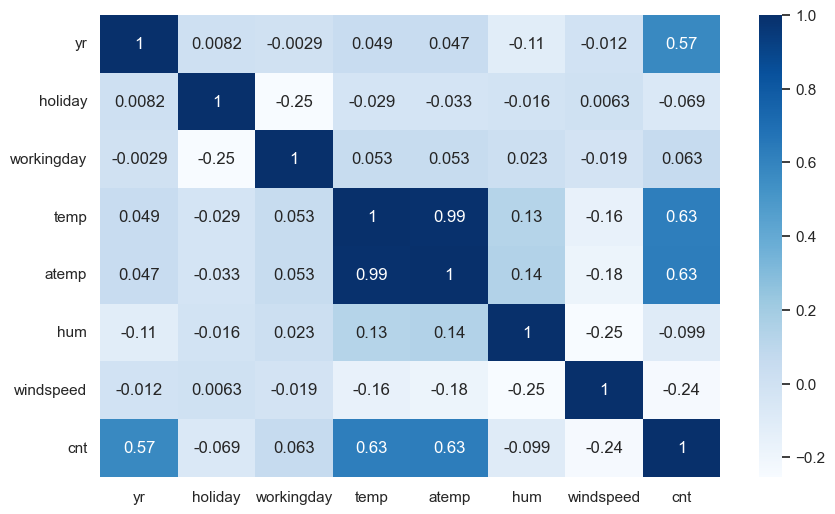

In [15]:
# Heatmap of all variables against each other to see ther co-relations
plt.figure(figsize=(10,6))
sns.heatmap(bike_sharing_data.corr(),annot=True,cmap='Blues')
plt.show()

## Step 3: Data Preparation

In [16]:
# Create dummy variables for all the categorical variables like 0 and 1
# We need to convert them into dummy variables, because machines does not understand their indivisual meanings
bike_data_dummies=pd.get_dummies(bike_sharing_data[['season','mnth','weekday','weathersit']],drop_first=True)
bike_data_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
# We then join orignal data and the dummy variable dataframe 'status'.
bike_sharing_data_final=pd.concat([bike_sharing_data,bike_data_dummies],axis=1)
bike_sharing_data_final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,1,0
1,spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,1,0
2,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Thurs,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [18]:
# We then drop the indivisual columns whose dummy variables have been created.
bike_sharing_data_final=bike_sharing_data_final.drop(['season','mnth','weekday','weathersit'],axis=1)
bike_sharing_data_final.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [19]:

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_data_final, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features
There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [20]:
# Create an object to be scaled
scaler=MinMaxScaler()

In [21]:
# Make list of all the variables to be scaled
var_scale=['temp','atemp','hum','windspeed','cnt']

In [22]:
# Scale all the numeric variables between 0 to 1
df_train[var_scale]=scaler.fit_transform(df_train[var_scale]) 
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,1,0


## Analysis of Variables using Correlaion-Co-efficient

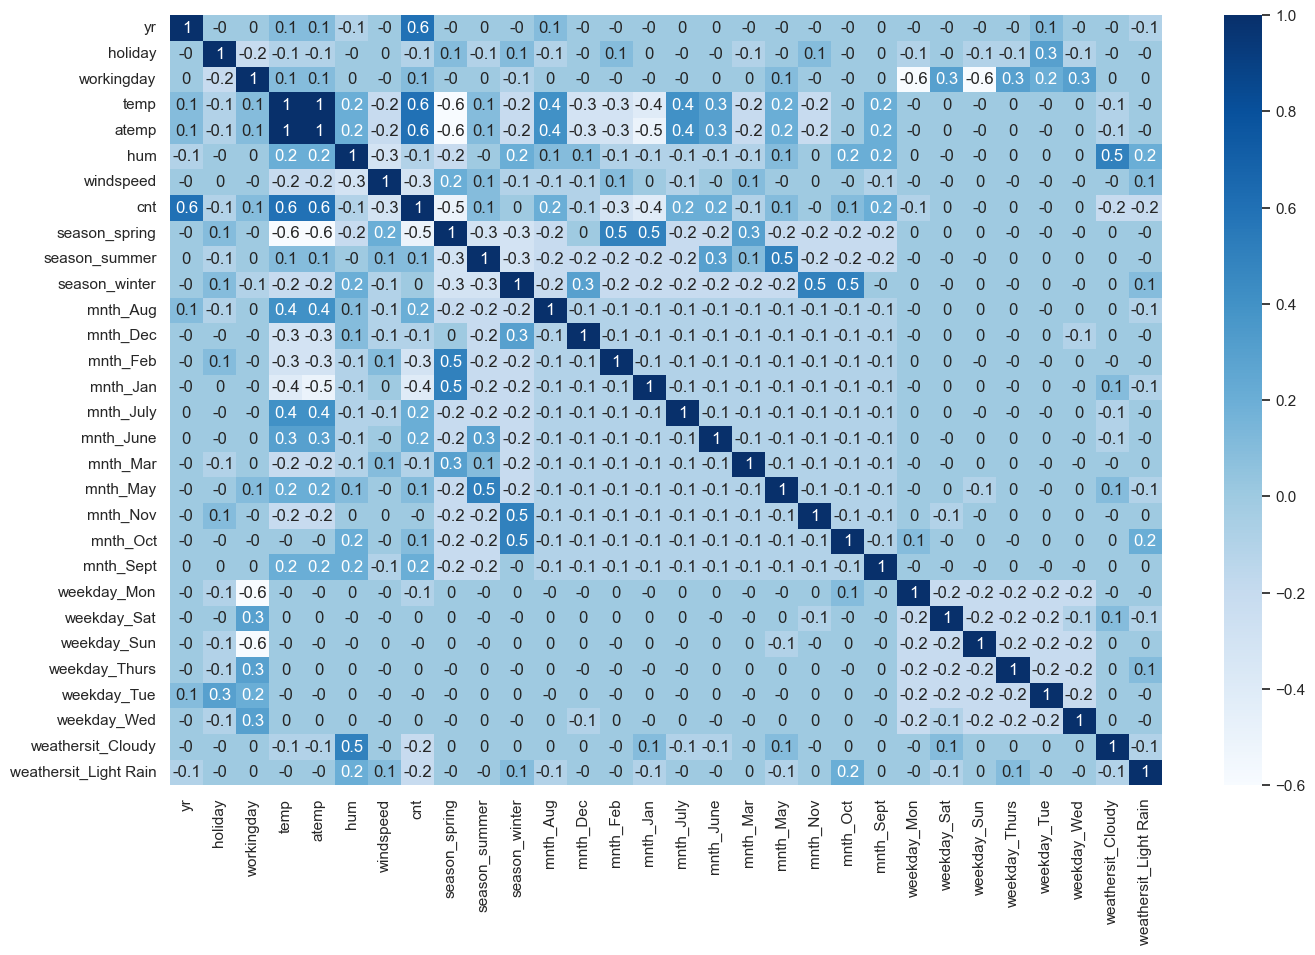

In [23]:
df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='Blues')
plt.show()

### Inference
From the above HeatMap, we see that no variable is highly correlated with another variable. So, we can proceed with Multi-Collinearity by creating models

## Step 5: Building a linear model


In [24]:
y_train=df_train.pop('cnt')
X_train=df_train

In [25]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)             
rfe = rfe.fit(X_train, y_train)

In [27]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', False, 2),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 2),
 ('mnth_Mar', False, 2),
 ('mnth_May', False, 2),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 2),
 ('mnth_Sept', False, 2),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 2),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 2),
 ('weathersit_Cloudy', False, 2),
 ('weathersit_Light Rain', True, 1)]

In [28]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'mnth_Aug', 'mnth_Feb', 'mnth_July', 'weekday_Mon',
       'weekday_Sun', 'weathersit_Light Rain'],
      dtype='object')

In [29]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Sat', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Cloudy'],
      dtype='object')

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [31]:
#Function to build a model using statsmodel api
def build_model(df):
    X_train_sm = sm.add_constant(df)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [32]:
#Function to calculate VIFs
def get_vif(df):
    df1 = df
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model1

In [33]:
#Selected columns for Model 1 - all columns selected by RFE
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          6.15e-178
Time:                        19:47:42   Log-Likelihood:                 482.42
No. Observations:                 510   AIC:                            -936.8
Df Residuals:                     496   BIC:                            -877.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [34]:
# From Model 1, holiday and atemp columns are having high P-value, expected P value shold be less than 0.05 
# hence we can drop one of the column from this and rebuild the model again

### Model2

In [35]:
# Removing the variable 'atemp' based on its High p-value & High VIF
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

build_model(X_train_new)
get_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          5.55e-179
Time:                        19:47:42   Log-Likelihood:                 482.16
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     497   BIC:                            -883.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [36]:
# From Model 2, mnth_Feb column is having high P-value, expected P value shold be less than 0.05 
# hence we can drop this column

 ### Model 3

In [37]:
# Removing the variable 'mnth_Feb' based on its High p-value

X_train_new = X_train_new.drop(["mnth_Feb"], axis = 1)

build_model(X_train_new)
get_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.84e-180
Time:                        19:47:43   Log-Likelihood:                 482.12
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     498   BIC:                            -889.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

 ### Model 4

In [38]:
# Removing the variable 'holiday' based on its High p-value

X_train_new = X_train_new.drop(["holiday"], axis = 1)

build_model(X_train_new)
get_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.84e-180
Time:                        19:47:43   Log-Likelihood:                 482.12
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     498   BIC:                            -889.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

 ### Model 5

In [39]:
# Removing the variable 'weekday_Mon' based on its High p-value

X_train_new = X_train_new.drop(["weekday_Mon"], axis = 1)

build_model(X_train_new)
get_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          9.96e-181
Time:                        19:47:43   Log-Likelihood:                 480.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     499   BIC:                            -892.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

### Model 6

In [40]:
## Removing the variable 'temp' based on its High VIF value
X_train_new = X_train_new.drop(["temp"], axis = 1)

build_model(X_train_new)
get_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.66e-133
Time:                        19:47:43   Log-Likelihood:                 366.46
No. Observations:                 510   AIC:                            -712.9
Df Residuals:                     500   BIC:                            -670.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.59

In [41]:
#Build a model with all the above columns
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [42]:
lr = build_model_sk(X_train_new,y_train)
print(lr.intercept_,lr.coef_)

0.5963249082346337 [ 0.24531485  0.05098702 -0.18248896 -0.21779624 -0.26406724  0.06260446
  0.04450016  0.05332294 -0.22792962]


## Step 6: Residual Analysis of the train data

In [43]:
y_train_pred = lr.predict(X_train_new)

In [44]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

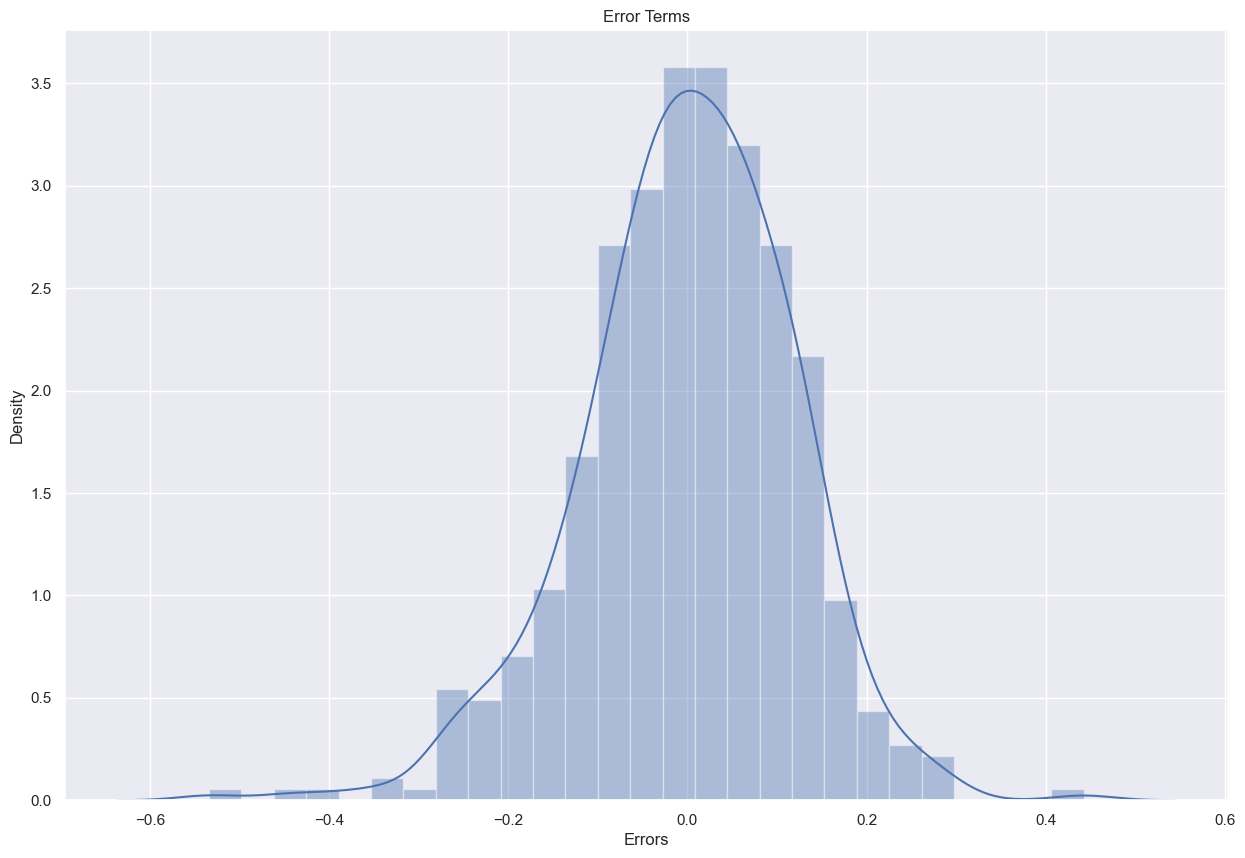

In [45]:
plot_res_dist(y_train, y_train_pred)

In [46]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7236434157082441

## Step 7: Making Predictions Using the Final Model using test data

In [47]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
print(var_scale)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [49]:
# Scale all the numeric variables between 0 to 1
df_test[var_scale]=scaler.transform(df_test[var_scale]) 
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    int64  
 1   holiday                219 non-null    int64  
 2   workingday             219 non-null    int64  
 3   temp                   219 non-null    float64
 4   atemp                  219 non-null    float64
 5   hum                    219 non-null    float64
 6   windspeed              219 non-null    float64
 7   season_spring          219 non-null    uint8  
 8   season_summer          219 non-null    uint8  
 9   season_winter          219 non-null    uint8  
 10  mnth_Aug               219 non-null    uint8  
 11  mnth_Dec               219 non-null    uint8  
 12  mnth_Feb               219 non-null    uint8  
 13  mnth_Jan               219 non-null    uint8  
 14  mnth_July              219 non-null    uint8  
 15  mnth_

In [51]:
#columns from last final model
X_train_new.columns

Index(['yr', 'workingday', 'hum', 'windspeed', 'season_spring', 'mnth_Aug',
       'mnth_July', 'weekday_Sun', 'weathersit_Light Rain'],
      dtype='object')

In [52]:
model_cols = ['yr', 'workingday', 'hum', 'windspeed', 'season_spring', 'mnth_Aug',
       'mnth_July', 'weekday_Sun', 'weathersit_Light Rain']

#Predicting test data values
y_test_pred = lr.predict(df_test[model_cols])

## R-Squared value for test predictions

In [53]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7226603549539126

In [54]:
##Evaluating the model

In [55]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.7226603549539126

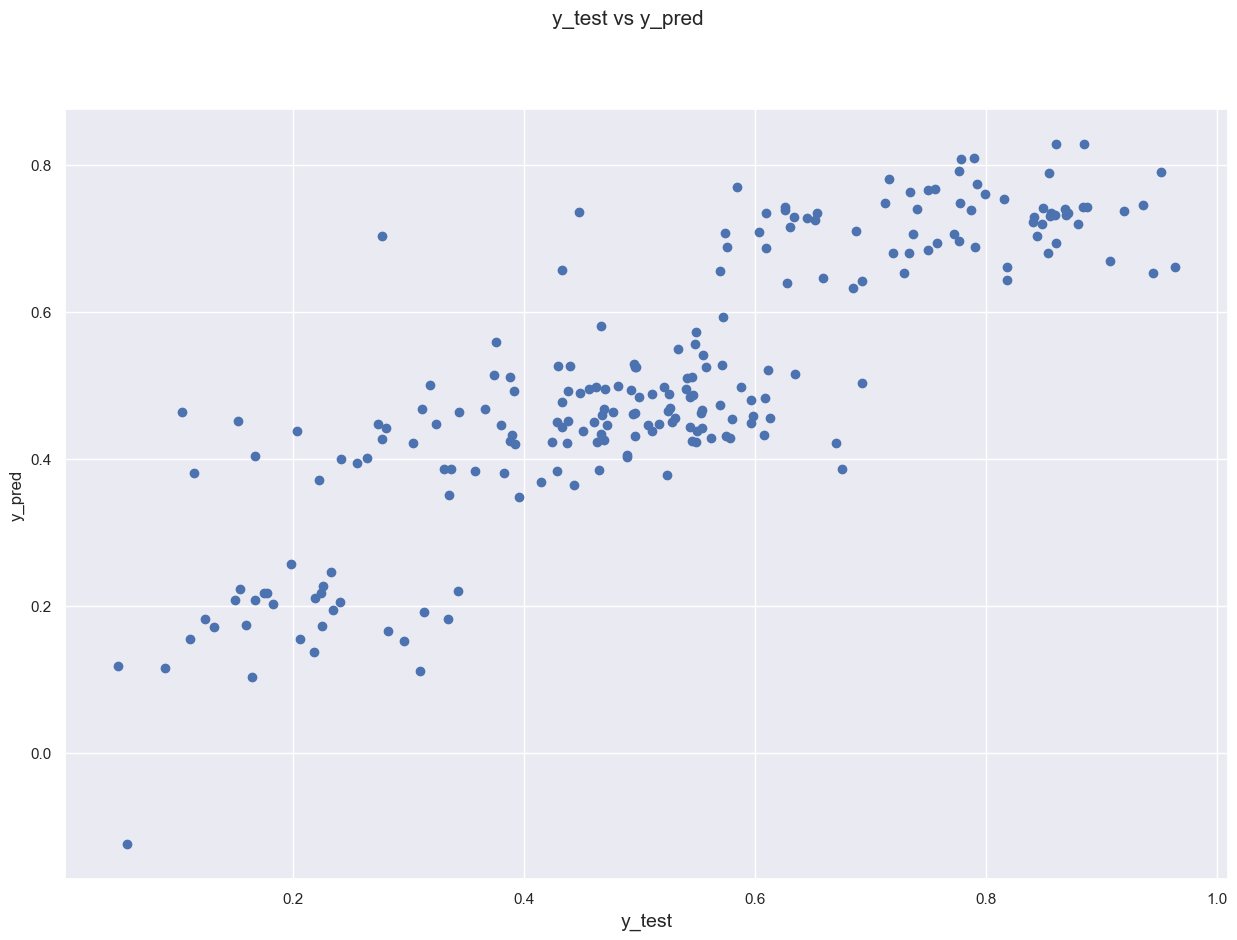

In [56]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 
plt.show()

### Inference
R2 score has negligible difference i.e. R2 score value of train (0.7236434157082441) and test data (0.7226603549539126) are almost same, so we can infer this is the good model

## Step 8: Model Evaluation

In [57]:
#Let us rebuild the final model using statsmodel to interpret it

lm = build_model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.66e-133
Time:                        19:47:44   Log-Likelihood:                 366.46
No. Observations:                 510   AIC:                            -712.9
Df Residuals:                     500   BIC:                            -670.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.59

# Conclusion
Significant variables to predict the demand for shared bikes

Year (yr) - A coefficient value of '0.2453' indicated that a unit increase in yr variable increases the bike hire numbers by 0.2453 units.

season_spring (season_spring) - A coefficient value of '-0.2641' indicated that, a unit increase in season_spring variable decreases the bike hire numbers by 0.2641 units.

weathersit_Light Rain - A coefficient value of '-0.2279' indicated that, a unit increase in season_spring variable decreases the bike hire numbers by 0.2279 units.